In [8]:
!pip install numpy
!pip install pandas

In [9]:
import numpy as np
import pandas as pd

### 1. Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el álgebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de técnicas relacionadas con el aprendizaje automético. Con ella, podemos describir el proceso de propagación hacia adelante en una red neuronal, identificar m´ınimos locales en funciones multivariables (crucial para el proceso de retropropagación) o la descripción y empleo de métodos de reducción de la dimensionalidad, como el análisis de componentes principales (PCA), entre muchas otras aplicaciones. 
### Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello, el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada variante en términos del coste computacional del mismo. En este caso en particular, y a modo de ilustración, nos centraremos en el cálculo del determinante de una matriz. 


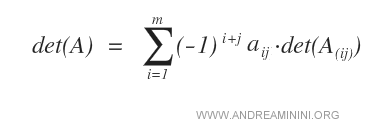

La regla de Laplace es un método que permite calcular rápidamente el determinante de una matriz cuadrada con dimensión de nXn mediante una serie de expansión recursiva. 

det(A): es el determinante de la matriz original A, de tamaño nxn_

(−1) ^(i+j) : es el signo del cofactor, que alterna según la posición 

aij: es el elemento de la matriz A en la fila i y columna j. Es el elemento alrededor del cual se calcula el cofactor.

det(A(ij)): es el determinante del menor, es decir, de la submatriz que se obtiene eliminando la fila i y la columna j de la matriz original A.

#### a) [1 punto] Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.


In [10]:
def determinante_recursivo(A):
    '''
    Esta función calcula el determinante por el método de laplace.
    Calcula de forma recursiva un determinante cuadrado cualquiera.
    '''
    #Asegurarse de que la matriz sea cuadrada
    n, m = A.shape
    if n != m:
        raise ValueError('La matriz no es cuadrada, no se puede calcular por Laplace')

    #Caso base en que la matriz dada sea 1x1
    if n == 1:
        return A[0,0]
    #Caso base de que la matriz dada o recursiva sea 2x2
    if n == 2:
        return A[0,0] * A[1,1] - A[0,1] * A[1,0]

    #recursividad
    det = 0
    for j in range(n):
        cofactor = (-1)**(j)
        menor = np.delete(np.delete(A, 0, axis=0), j, axis=1)
        
        det += cofactor * A[0, j] * determinante_recursivo(menor)

    return det
            

In [11]:
matriz = np.array([[6,2,4,7],[7,4,7,5],[1,5,6,7],[4,6,8,7]])
determinante_recursivo(matriz)

42

#### b) [0.5 puntos] Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.


La respuesta es Sí.

En caso de que la matriz sea triangular y n x n la matriz se puede calcular fácilmente como el producto de los elementos de su diagonal principal.

Sea una matriz triangular nxn: 

La manera para calcular su determinante viene dada por la siguiente fórmula:
det(A) = a11 * a22 * a33 * .... * ann = det(A) = 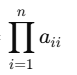

JUSTIFICACIÓN:
En las matrices triangulares, el cálculo del determinante se simplifica  gracias a la disposición de ceros fuera de la diagonal principal. Esta estructura hace que, al aplicar la definición mediante cofactores, la mayoría de los términos se anulen al contener productos con elementos nulos.
Además, si se lleva a cabo una eliminación gaussiana sin intercambiar filas, las operaciones realizadas no modifican el valor del determinante y permiten mantener la forma triangular de la matriz. Como consecuencia, el determinante resulta ser simplemente el producto de los elementos de la diagonal.


EJEMPLO:

A = 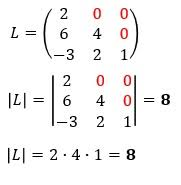


Método de laplace:

det(A) = 2 * [[4,0],[2,1]] + 0 * [[6,9],[-3,1]] + 0 * [[6,4],[-3,2]] = 2 * 4 * 1 = 8

Cómo se puede observar al calcular el determinante por el método de laplace, muchos términos se eliminan automáticamente si están multiplicados por ceros en la fila o columna seleccionada, lo que reduce el número de operaciones necesarias. En este caso, la presencia de ceros en la primera fila hace que solo el primer menor tenga efecto en el cálculo, simplificando considerablemente el proceso. 







c) [0.5 puntos] Determínese de forma justificada cómo alteran el determinante de una matriz n×n las dos operaciones elementales siguientes:

    -Intercambiar una fila (o columna) por otra fila (o columna).

    -Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

En primer lugar, si se intercambia una fila o columna por otra, equivale a una permitación del determinante que cambia el orden de los elementos. 

Entrando en la teoría de los determinantes, esta permutación tiene una paridad: par o impar. Por lo tanto, hacer un intercambio de filas/columnas es una permutación impar, por lo que multiplica el determinante por -1.

Finalmente, tenemos que si cambiamos una fila o columna por otra tenemos el determinante de la matriz origen pero cambiada de signo:
    A = matriz original; A' = Matriz intercambiada columna/fila

    Det(A) = -Det (A')

Ejemplo: 
A = (3,3)   A'=(4,6)
    (4,6)      (3,3) 

    DET(A) = 3 * 6 - 3 * 4 = 6
    DET(A') =4 * 3 - 6 * 3 = -6      Det(A) = -Det (A')

Como podemos observar, al cambiar las filas de orden estamos permutando una vez y la matriz cambia de signo.




Con relación a sumar una fila o columna otra fila o columna multiplicada por un escalar α, el determinante NO CAMBIA DE SIGNO.
Esto se debe a que esta operación es una combinación lineal de filas (o columnas), y no altera el espacio generado ni el volumen (geometría) que representa el determinante.

Por propiedades del determinante, añadir a una fila otra fila multiplicada por un escalar no afecta el determinante.
    
    A = matriz original; A' = Matriz tras sumar fila/columna por otra escalada

    Det(A) = Det (A')

Ejemplo: 
A = (1,2)   A'=(1,2)
    (3,4)      (5,8) ← Fila 2 = Fila2 + 2 × Fila1 

DET(A)  = 1 × 4 − 2 × 3  = 4 − 6  = -2  
DET(A') = 1 × 8 − 2 × 5  = 8 − 10 = -2  

Det(A) = Det(A') 




    

####  c) [0.5 puntos] Determínese de forma justificada cómo alteran el determinante de una matriz n×n las dos operaciones elementales siguientes:
- Intercambiar una fila (o columna) por otra fila (o columna).
- Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

####   d) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e  impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular  inferior) a partir de las operaciones elementales descritas en el apartado anterior.


#### e) [0.5 puntos] ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio  de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?  Implementa una nueva función, determinante  gauss, que calcule el determinante de  una matriz utilizando eliminación gaussiana.
#### f ) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante  con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.
 #### g) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la  forma An ∈ Rn× n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de  ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
 - Utilizando determinante_recursivo.
- Empleando determinante_gauss.
- Haciendo uso de la función preprogramada numpy.linalg.det.



####   d) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e  impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular  inferior) a partir de las operaciones elementales descritas en el apartado anterior.

Este método se utiliza para llevar una matriz a una forma mas simple, como el escalonamiento correspondiente a una matriz triangular.
Implica la eliminación de filas para crear ceros en posiciones específicas. Donde al final, el resultado puede ser una matriz triangular inferior. 

Pivoteo parcial: En cada columna, se seleccionan como pivote el elemento de mayor valor absoluto dentro de las filas que aún no sido eliminadas.
Si el pivote no está en la posición actual, intercambiamos filas. Este paso mejora la estabilidad numérica, evitando divisiones por números muy pequeños.


Pasos del algoritmo

1.	Para k = n-1 hasta 1: Recorremos las columnas de derecha a izquierda, esto asegura que se construyan una matriz triangular
    inferior eliminando los elementos por encima de la diagonal desde la ultima columna hacia la primera.
2.	Pivoteo parcial: Buscar el máximo absoluto de la columna k, esto mejora la estabilidad numérica del método y evita divisiones
    por valores cercanos a cero.


3. Eliminacion hacia arriba
   
   a) Para cada fila i = 0 hasta k - 1
     Calcular el factor: Este indica cuantas veces se necesita restar la fila pivote para eliminar el valor en la posicion  $A_{ik}$

   $$f = \frac{A_{ik}}{A_{kk}}$$


Restar la fila multiplicada por el factor: Esto elimina el elemento  $A_{ik}$ y mantiene la equivalencia.             
$$A_{ij} = A_{ij} - f \cdot A_{ik}$$


####   e) [0.5 punto] ¿Como se podria calcular el determinante de una matriz haciendo beneficio de la estrategia anterioir y del efecto de aplicar las operaciones elementales pertinentes? implementar una nueva funcion, determinante Gauss, que calcule el determinante de una matriz utilizando eliminacion gaussiana.

Utilizamos eliminación hacia arriba (triangular inferior), aplicando:
- Pivoteo parcial (para mayor estabilidad numérica)
- Registro del número de intercambios de filas
- Producto de la diagonal ajustado por el signo
- Calculamos el determinante con la siguiente ecuacion
  
  Donde: 
  $L_{ii}$   elementos en la diagonal de la matriz triangular inferior, "m" numero de intercambios de fila
  

$$\det(A) = (-1)^m \cdot \prod_{i=1}^n L_{ii}$$



Efecto de las Operaciones Elementales
| Operación Elemental                   | Efecto sobre el determinante         |
|--------------------------------------|--------------------------------------|
| Intercambiar dos filas               | Cambia el signo (-1)                      |
| Sumar múltiplo de una fila a otra    | No cambia el determinante            |
| Multiplicar una fila por escalar     | Multiplica el determinante por ese escalar  |

En conclusion este metodo evita la recursividad, respeta las reglas de los determinantes frente a operaciones de fila y permite calcular eficientemente determinantes incluso en matrices grandes

In [12]:
import numpy as np

def determinante_gauss_inferior_paso_a_paso(A_matriz):
    A = A_matriz.astype(float).copy()
    n = A.shape[0]
    det = 1.0
    intercambio = 0
    pasos = []

    pasos.append("Matriz inicial:\n" + str(A))

    for k in reversed(range(1, n)):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[:k+1, k]))
        pasos.append(f"Paso {n - k}: Pivoteo parcial en columna {k}")
        pasos.append(f"Fila con máximo valor absoluto en columna {k}: fila {max_row}")
        
        if A[max_row, k] == 0:
            pasos.append("Columna con pivote cero. Determinante = 0.")
            return pasos, 0
        
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            intercambio += 1
            pasos.append(f"Intercambio de filas {k} y {max_row}")
            pasos.append("Matriz después del intercambio:\n" + str(A))

        # Eliminación hacia arriba
        for i in range(0, k):
            factor = A[i, k] / A[k, k]
            A[i, :k+1] -= factor * A[k, :k+1]
            pasos.append(f"Eliminación en fila {i}, factor = {factor:.4f}")
            pasos.append("Matriz después de eliminación:\n" + str(A))

    for i in range(n):
        det *= A[i, i]

    det *= (-1) ** intercambio
    pasos.append(f"Producto de diagonales: {np.prod(np.diag(A)):.4f}")
    pasos.append(f"Número de intercambios de filas: {intercambio}")
    pasos.append(f"Determinante final: {det:.4f}")

    return pasos, det

# Ejemplo de uso
A = np.array([
    [3, 1, 3],
    [2, 4, 1],
    [1, 3, 2]
])

pasos, determinante = determinante_gauss_inferior_paso_a_paso(A)

for paso in pasos:
    print(paso)

print(f"\nDeterminante = {determinante}")

Matriz inicial:
[[3. 1. 3.]
 [2. 4. 1.]
 [1. 3. 2.]]
Paso 1: Pivoteo parcial en columna 2
Fila con máximo valor absoluto en columna 2: fila 0
Intercambio de filas 2 y 0
Matriz después del intercambio:
[[1. 3. 2.]
 [2. 4. 1.]
 [3. 1. 3.]]
Eliminación en fila 0, factor = 0.6667
Matriz después de eliminación:
[[-1.          2.33333333  0.        ]
 [ 2.          4.          1.        ]
 [ 3.          1.          3.        ]]
Eliminación en fila 1, factor = 0.3333
Matriz después de eliminación:
[[-1.          2.33333333  0.        ]
 [ 1.          3.66666667  0.        ]
 [ 3.          1.          3.        ]]
Paso 2: Pivoteo parcial en columna 1
Fila con máximo valor absoluto en columna 1: fila 1
Eliminación en fila 0, factor = 0.6364
Matriz después de eliminación:
[[-1.63636364  0.          0.        ]
 [ 1.          3.66666667  0.        ]
 [ 3.          1.          3.        ]]
Producto de diagonales: -18.0000
Número de intercambios de filas: 1
Determinante final: 18.0000

Determinante

####   f) [0.5 punto] Obtén la complejidad computacional asociada al cálculo del determinante  con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.

Complejidad recursiva

Calcular la determinante de una matriz n x n mediante métodos recursivos requiere evaluar el determinante de n matrices, cada una de tamaño n-1, seguido de aproximadamente 2n operaciones (sumas y multiplicaciones). Por lo tanto, el costo es T(n) = nT(n-1) + O(n). si se dibuja el árbol de recursión o se utiliza otros métodos para resolver recurrencias, se obtendrá T(n) = O(n!)

Complejidad por el método de eliminación de Gauss con pivoteo parcial

La eliminación Gaussiana implica una serie de operaciones de fila para transformar una matriz a la forma triangular superior e inferior. Esta complejidad temporal se puede analizar contando el numero de operaciones necesarias para realizar estas operaciones de fila. 
Para una matriz n x n el número de operaciones requeridas es proporcional a n³. específicamente, la complejidad temporal es O(n³), donde n es el numero de variables en el sistema.

| Matriz     | Recursividad O(n!) | Gauss O(n³) |
|------------|--------------------|-------------|
| 3 × 3      | ~6                 | ~22         |
| 4 × 4      | ~28                | ~50         |
| 5 × 5      | ~120               | ~100        |
| 6 × 6      | ~720               | ~180        |
| 9 × 9      | ~362,880           | ~648        |
| 10 × 10    | ~3,628,800+        | ~715        |



Como concecuencia de lo expuesto el metodo de eliminacion de Gauss es mas costoso para tamaños pequeños, escalara mejor a medida que aumente el tamaño de la matriz.

#### g) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la  forma An ∈ Rn× n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de  ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
 - Utilizando determinante_recursivo.
- Empleando determinante_gauss.
- Haciendo uso de la función preprogramada numpy.linalg.det.

In [13]:
import numpy as np
import time

# ===== Función para el cálculo recursivo (Laplace) =====
def determinante_recursivo(A):
    n = A.shape[0]
    if n == 1:
        return A[0, 0]
    det = 0
    for j in range(n):
        submatriz = np.delete(np.delete(A, 0, axis=0), j, axis=1)
        det += ((-1) ** j) * A[0, j] * determinante_recursivo(submatriz)
    return det

# ===== Gauss con pivoteo parcial =====
def gauss_eliminacion_parcial(A):
    A = A.astype(float)
    n = A.shape[0]
    num_permutaciones = 0

    for k in range(n):
        max_row = np.argmax(abs(A[k:, k])) + k
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            num_permutaciones += 1
        for i in range(k + 1, n):
            if A[k, k] == 0:
                continue
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
    return A, num_permutaciones

def determinante_gauss(A):
    U, num_permutaciones = gauss_eliminacion_parcial(A.copy())
    diag_product = np.prod(np.diag(U))
    return int(round(diag_product * (-1) ** num_permutaciones))

# ===== Generador de matriz aleatoria =====
def generar_matriz_aleatoria(n, minimo=1, maximo=10):
    return np.random.randint(minimo, maximo, size=(n, n))

# ===== Comparador de tiempos =====
def comparar_tiempos(A):
    n = A.shape[0]
    print(f"n = {n}")

    # --- Método Recursivo ---
    if n <= 10:
        start = time.time()
        det_rec = determinante_recursivo(A)
        t_rec = time.time() - start
        print(f"Laplace (recursivo): {t_rec:.6f} s (Det: {det_rec})")
    else:
        print("Laplace (recursivo): No calculado")

    # --- Método Gauss ---
    start = time.time()
    det_gauss = determinante_gauss(A)
    t_gauss = time.time() - start
    print(f"Gauss:               {t_gauss:.6f} s (Det: {det_gauss})")

    # --- Método NumPy ---
    start = time.time()
    det_numpy = round(np.linalg.det(A))
    t_numpy = time.time() - start
    print(f"NumPy:               {t_numpy:.6f} s (Det: {det_numpy})")

    print("-" * 50)

# ===== Ejecutar comparaciones de n=2 a n=10 =====
for n in range(2, 11):
    A = generar_matriz_aleatoria(n)
    comparar_tiempos(A)


n = 2
Laplace (recursivo): 0.000000 s (Det: -51)
Gauss:               0.000000 s (Det: -51)
NumPy:               0.000000 s (Det: -51)
--------------------------------------------------
n = 3
Laplace (recursivo): 0.000000 s (Det: 3)
Gauss:               0.000000 s (Det: 3)
NumPy:               0.000000 s (Det: 3)
--------------------------------------------------
n = 4
Laplace (recursivo): 0.001006 s (Det: 354)
Gauss:               0.000000 s (Det: 354)
NumPy:               0.000000 s (Det: 354)
--------------------------------------------------
n = 5
Laplace (recursivo): 0.000999 s (Det: -10152)
Gauss:               0.000000 s (Det: -10152)
NumPy:               0.001001 s (Det: -10152)
--------------------------------------------------
n = 6
Laplace (recursivo): 0.009510 s (Det: 112530)
Gauss:               0.001001 s (Det: 112530)
NumPy:               0.000000 s (Det: 112530)
--------------------------------------------------
n = 7
Laplace (recursivo): 0.053525 s (Det: 251318)
Gauss:

Conclusion:

El metodo recursivo es perfecta para matrices pequeñas n < 5 con fines academicos. mientras Gauss y Numpy al tener complejidad polinomial, son adecuados para matrices grandes, Numpy se destaca por su simplicidad y optimizacion interna.

### 2. En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.

#### a) [1 punto] Prográmese en Python el método de descenso de gradiente para funciones de $n$ variables.
La función deberá tener como parámetros de entrada:

- El gradiente de la función que se desea minimizar $\nabla f$ (puede venir dada como otra función previamente implementada, grad_f, con entrada un vector, representando el punto donde se quiere calcular el gradiente, y salida otro vector, representando el gradiente de $f$ en dicho punto).
- Un valor inicial $x_0 \in \mathbb{R}^n$ (almacenado en un vector de $n$ componentes).
- El ratio de aprendizaje $\gamma$ (que se asume constante para cada iteración).
- Un parámetro de tolerancia tol (con el que finalizar el proceso cuando $\|\nabla f(x)\|_2 < \text{tol}$).
- Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).

La salida de la función deberá ser la aproximación del $x$ que cumple $f'(x) \approx 0$, correspondiente a la última iteración realizada en el método.


Para la realización de la función que pide el ejercio se ha creado una función con nombre descenso_gradiente(), esta función recreará el descenso de gradiente. Tal y como pide el enunciado a esta función se le pasan las variables requeridas grad_f(función que almacena la función sobre la que se realiza el estudio), x0 (punto de partida), gamma (ratio de aprendizaje), tol (umbral de parada) y maxit (máximo número de iteraciones que se puede llegar a utilizar). De esta manera se tiene la siguiente función:

In [14]:
#Función de descenso de gradiente que miniminiza una función  f: R^n -> R
from collections.abc import Callable


def descenso_gradiente(grad_f: Callable, x0: int | list, gamma: float, tol: int, maxit: int):
    x = np.asarray([x0], dtype=float).copy()
    for k in range(1, maxit + 1):
        g = grad_f(x)
        g_norm = np.linalg.norm(g, ord=2)
        
        if g_norm < tol:
            break
        
        x -= gamma * g              
    
    return x, k


#### b) Sea la función $f : \mathbb{R} \to \mathbb{R}$ dada por

$$
f(x) = 3x^4 + 4x^3 - 12x^2 + 7.
$$

**I.** [0.5 puntos] Aplica el método sobre $f(x)$ con $x_0 = 3$, $\gamma = 0.001$, tol=1e-12, maxit=1e5.

In [15]:
def gradiente_f(x: float):
    return np.array([
        12*x[0]**3 + 12*x[0]**2 - 24*x[0]
    ])

In [16]:
gradiente_1 = descenso_gradiente(grad_f=gradiente_f, x0=3, gamma=0.001, tol=1e-12, maxit=int(1e5))

gradiente_1

(array([1.]), 832)

**II.** [0.5 puntos] Aplica de nuevo el método sobre  $f(x)$ con $x_0 = 3$, $\gamma = 0.001$, tol=1e-12, maxit=1e5. 

In [17]:
gradiente_2 = descenso_gradiente(grad_f=gradiente_f, x0=3, gamma=0.01, tol=1e-12, maxit=int(1e5))

gradiente_2

(array([-2.]), 32)

**III.** [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje $\gamma$?

Para empezar a interpretar los resultados, primeramente hemos de obtener los puntos críticos de la función.
Si derivamos la función, obtenemos la siguiente: $$f'(x) = 12x^3 + 12x^2 - 24x$$ <br />
Al factorizar la función, obtenemos la siguiente: $$f'(x) = 12x(x+2)(x−1)$$ <br />
Resultando estos puntos críticos $$x_1=0; x_2=-2; x_3=1$$

In [18]:
data = [['Gradiente 1', '1', '2', '1', '0', '1-1', '832'], ['Gradiente 2', '-2', '-25', '-2', '0', '-2+2', '32'], 
        ["Análitico -2", '-2', '-25', '-', '0', '0', np.nan], ["Análitico 1", '1', '2', '-', '0', '0', np.nan]]

df = pd.DataFrame(data=data, columns=["Método", "x", "f(x)", "Punto crítico", "Δx", "Δf", "Iteraciones"])

df

,Método,x,f(x),Punto crítico,Δx,Δf,Iteraciones
0,Gradiente 1,1,2,1,0,1-1,832
1,Gradiente 2,-2,-25,-2,0,-2+2,32
2,Análitico -2,-2,-25,-,0,0,NaN
3,Análitico 1,1,2,-,0,0,NaN


Gradiente 1 converge en x=1 (mínimo local) tras 832 iteraciones y f(1)=2; <br /><br />
Gradiente 2 llega en solo 32 pasos a x=−2 (mínimo global) con f(−2)=−25. <br /><br />
Un γ más grande acelera la búsqueda y evita mínimos locales. Para poder obtener el óptimo global, lo que se puede hacer, es ajustar el paso o usar un método adaptativo.

**IV.** [0.5 puntos] Aplica nuevamente el método sobre $f(x)$ con $x_0 = 3$, $\gamma$ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.

In [19]:
gradiente_3 = descenso_gradiente(grad_f=gradiente_f, x0=3, gamma=0.1, tol=1e-12, maxit=int(1e5))

gradiente_3

C:\Users\bladi\AppData\Local\Temp\ipykernel_21940\2794306594.py:3: RuntimeWarning: overflow encountered in scalar power
  12*x[0]**3 + 12*x[0]**2 - 24*x[0]
C:\Users\bladi\AppData\Local\Temp\ipykernel_21940\2794306594.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  12*x[0]**3 + 12*x[0]**2 - 24*x[0]


(array([nan]), 100000)

El gradiente no se ha podido calcular ya que la variable gamma es demasiado alta para la pendiente que hay en el principio de la función. El valor de la derivada salta a los millones y esto provoca que la representación dentro de una variable np.float64 se desborde y cause un stack overflow.<br />
Al tener una tasa tan grande, da unos pasos muy grandes en cada iteración lo que provoca que al final no llegue nunca a un mínimo y no converga.

**V.** [0.5 puntos] Finalmente, aplica el método sobre $f(x)$ con $x_0 = 0$, $\gamma = 0.001$, tol=1e-12, maxit=1e5. Interpreta el resultado y compáralo con el estudio analítico de $f$. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [20]:
gradiente_4 = descenso_gradiente(grad_f=gradiente_f, x0=0, gamma=0.001, tol=1e-12, maxit=int(1e5))

gradiente_4

(array([0.]), 1)

No es un resultado deseable ya que la función a convergido cuando x = 0 en la primera iteración.<br />
Este resultado no es aceptable ya que cuando x = 0, no es un mínimo local sino un máximo local, y lo que se quiere hacer es minimizar el coste de la función.


#### c) Sea la función $g : \mathbb{R}^2 \to \mathbb{R}$ dada por

$$
g(x, y) = x^2 + y^3 + 3xy + 1.
$$





In [21]:
#Se crea la variable con la función g
# Gradiente de g(x, y) = x^2 + y^3 + 3xy + 1
# ∂g/∂x = 2x + 3y
# ∂g/∂y = 3y^2 + 3x
def fun_g(x):
    return np.array([
        2*x[0][0] + 3*x[0][1],
        3*x[0][1]**2 + 3*x[0][0]
    ])

**I.** [0.5 puntos] Aplíquese el método sobre $g(x, y)$ con $\mathbf{x}_0 = (-1, 1)$, $\gamma = 0.01$, tol=1e-12, maxit=1e5.


Para este apartado se crean los parámetros para pasar a la función que calcula el descenso de gradiente para que de la solución aproximada.


In [22]:
x_opt, iters = descenso_gradiente(grad_f=fun_g, x0=[-1, 1], gamma=0.01, tol=1e-12, maxit=int(1e5))

print(f"Solución aproximada: {x_opt} en {iters} iteraciones")

Solución aproximada: [[-2.25  1.5 ]] en 3140 iteraciones



**II.** [0.5 puntos] ¿Qué ocurre si ahora partimos de $x_0 = (0, 0)$? ¿Se obtiene un resultado deseable?



Para este apartado se crean los parámetros para pasar a la función que calcula el descenso de gradiente para que de la solución aproximada.

In [23]:
x_opt, iters = descenso_gradiente(fun_g, x0=[0, 0], gamma=0.01, tol=1e-12, maxit=int(1e5))

print(f"Solución aproximada: {x_opt} en {iters} iteraciones")

Solución aproximada: [[0. 0.]] en 1 iteraciones



Al tener como punto de partida  de $\mathbf{x}_0 = (0, 0)$, el gradiente de $g(x,y)$ en dicho punto es 0.

$$
\nabla g(0, 0) = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

Al ser el gradiente en el punto 0 el método de descenso gradiente finaliza en el acto. Esto debido a que la función piensa que ha llegao a un punto estacionario parando la ejecución y por tanto la búsqueda.
En esto caso que el gradiente sea 0 no significa que se haya encontrado un mínimo (tambien podría ser un máximo o un punto de silla). Para comprobar que tipo de punto es lo mejor es estudiar el Hessiano en dicho punto.
Al no ser un punto mínimo el resultado obtenido no es deseable.


**III.** [0.5 puntos] Realícese el estudio analítico de la función y utilícese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.

**Puntos Críticos:**

```math
\nabla g = \begin{pmatrix}
2x + 3y \\
3y^2 + 3x
\end{pmatrix} = 0
\quad\Longrightarrow\quad
\begin{cases}
2x + 3y = 0 \implies x = -\tfrac{3}{2}y,\\[6pt]
3y^2 + 3x = 0 \implies x = -y^2.
\end{cases}

```
<br /><br />
```math
 y = 0, x = 0 \quad\Longrightarrow\quad \begin{pmatrix} 0, 0 \end{pmatrix}

```

<br /><br />

```math
y \ne 0 \quad\Longrightarrow\quad \tfrac{3}{2} = y
```
<br />

```math
x \ne 0 \quad\Longrightarrow\quad x = \begin{pmatrix} \tfrac{3}{2} \end{pmatrix}^2
```
<br /><br />

```math
(x, y) = (-2.25, 1.5)




Ahora si se procede a utilizar la clasificación Haesiana, en el punto (0,0), se obtiene un punto de silla, en cambio al hacerlo con el punto (-2.25, 1.5), se encuentra el mínimo local.<br><br>
Podemos sacar como conclusión que el gradiente cuando es 0, no garantiza un mínimo. Para obtener un mínimo, hemos de escoger un punto inicial fuera de la silla